# Asymptotic Notation

First, let's review some asymptotic notation.  We'll see it a fair amount in this course.

Let $f(x), g(x)$ be some functions.  We say
$$f = O(g)$$
as $x\to \infty$ if there exists some constant $c\ge 0$ and $x_0\ge 0$ so that $ |f(x)| \le c g(x)$ for all $x \ge x_0$.

We say
$$f = \Omega(g)$$
as $x\to \infty$ if there exists some constant $c\ge 0$ and $x_0\ge 0$ so that $ |f(x)| \ge c g(x)$ for all $x \ge x_0$.

Finally,
$$f = \Theta(g)$$
if $f = O(g)$ and $f = \Omega(g)$ (some constant multiples of $g$ bound $f$ above and below).

Often we're interested in bounding worst-case behavior.  This means you'll see a lot of $O$, and less of $\Omega$ and $\Theta$.

You may also see little-o notation such as $f = o(g)$, or the corresponding $f = \omega(g)$.  Intuitively, $f = o(g)$ means $g$ grows much faster than $f$, i.e. $\frac{\vert f(x)\vert}{g(x)}\rightarrow 0$ as $x \rightarrow \infty$.  If $f = O(g)$ $f$ can grow at the same rate, but if $f = o(g)$, it grows at a slower rate.

Note that because we can scale by constant multiples, we typically drop them.
1. $O(5x) = 5x = O(x)$
2. $O(c) = O(1)$
3. $O(c f(x)) = O(f(x))$

## Examples

1. $x = O(x)$
2. $x = O(x^2)$
3. $x^a = O(x^b)$ for $a \le b$
4. $x^a = O(b^x)$ for any $a, b > 1$
5. $f = O(g)$ and $g = O(h)$ implies $f = O(h)$ (exercise: prove this)
6. $f = O(g)$ and $h = O(k)$ implies $f\times h = O(g \times k)$ (exercise: prove this as well)

## Answers to example 5 and 6

Answer to example 5: 

By definition, since $f = O(g)$, we know there exists some constant $p\ge 0$ and $x_0\ge 0$ so that $ |f(x)| \le p g(x)$ for all $x \ge x_0$; since $g = O(h)$, we know there exists some constant $q\ge 0$ and $x_1\ge 0$ so that $ |g(x)| \le q h(x)$ for all $x \ge x_1$. Therefore, we get $ |f(x)| \le p g(x)$ $ \le (p*q) h(x)$ as $x \ge $ $max$ {$x_0$, $x_1$}, which implies $f = O(h)$.

Answer to example 6:
Still, by definition, since $f = O(g)$, we know there exists some constant $p\ge 0$ and $x_0\ge 0$ so that $ |f(x)| \le p g(x)$ for all $x \ge x_0$; since $h = O(k)$, we know there exists some constant $q\ge 0$ and $x_1\ge 0$ so that $ |h(x)| \le q k(x)$ for all $x \ge x_1$. Now, take $x'$ = $max$ {$x_0$, $x_1$}, we know as $x\ge x'$, we have both $ |f(x)| \le p g(x)$ and $ |h(x)| \le q k(x)$. Therefore, now we have: $|(f\times h) (x)| \le |f(x)| * |h(x)| \le (p*q) g(x) k(x) = (p*q) (g\times k) (x)$, proved.

## Complexity

When we talk about [computational complexity](https://en.wikipedia.org/wiki/Computational_complexity), we are typically talking about the time or memory resources needed for an algorithm. 

For example, if an algorithm operates on an array of $n$ elements, we say the algorithm runs in $O(n^2)$ time if the run time scales (at worst) quadratically with the size $n$.

For example, consider the following function:

In [7]:
import numpy as np


def maximum(x):
    """
    returns the maximum value in an array x
    """
    xmax = -np.infty
    for xi in x:
        if xi > xmax:
            xmax = xi
            
    return xmax

maximum([1,2,3])

3

our `maximum` function loops over the list once, and at each step of the iteration we do a constant amount of work. If `maximum` takes in an array of length `n` as input, this means there are `n` iterations of the for-loop, so `maximum` takes $O(n)$ time to compute.  Note that we don't need to create any additional arrays, so we can also say `maximum` uses $O(1)$ (constant) extra space.

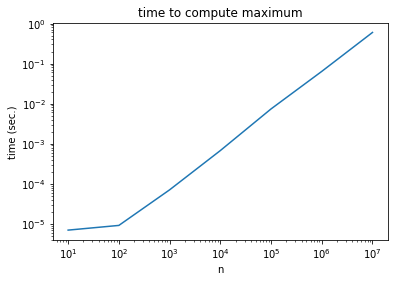

In [8]:
import matplotlib.pyplot as plt
from time import time

ns = [10**k for k in range(1,8)]
ts = []
for n in ns:
    a = np.random.rand(n)
    start = time()
    amax = maximum(a)
    end = time()
    ts.append(end - start)
    
plt.loglog(ns, ts)
plt.xlabel('n')
plt.ylabel('time (sec.)')
plt.title('time to compute maximum')
plt.show()

When plotting functions with polynomial complexity ($O(x^a)$ for some $a$), it is standard to use a `loglog` plot.

Why?  If $t(n) = \Theta(n^a)$, then 
\begin{align*}
t(n) &\sim   c n^a\\
\log t(n) &\sim a \log n + \log c
\end{align*}

I.e. the polynomial exponent is the slope of the line.

In [ ]:
ln = np.log(ns)
lt = np.log(ts)
coeff = np.polyfit(ln, lt, 1) # fit a polynomial
coeff[0] # highest degree (linear) term

Let's now consider the following function

In [10]:
def all_subarrays(x):
    """
    return all sub-arrays of x
    """
    if len(x) == 1:
        return [x, []]
    else:
        ret = []
        subs = all_subarrays(x[:-1]) # subarrays with all but the last element
        ret.extend(subs) # all subarrrays without the last element
        for s in subs:
            scpy = s.copy()
            scpy.append(x[-1])
            ret.append(scpy)
        return ret
        
all_subarrays([0,1,2])

[[0], [], [0, 1], [1], [0, 2], [2], [0, 1, 2], [1, 2]]

we see that the length of output of `all_subarrays` grows as $2^n$, where `n = len(x)`.  This is a good hint that the function has exponential time complexity and space complexity $O(2^n)$.

In [11]:
ns = range(1, 20)
ts = []
for n in ns:
    a = [i for i in range(n)]
    start = time()
    ret = all_subarrays(a)
    end = time()
    ts.append(end - start)

In this case, it is better to use a `semilogy` plot.

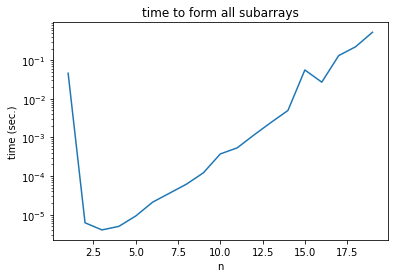

In [12]:
plt.semilogy(ns, ts)
plt.xlabel('n')
plt.ylabel('time (sec.)')
plt.title('time to form all subarrays')
plt.show()

## Exercise

Why does a semilogy plot make sense for plotting the time it takes to run a function with exponential time complexity?  

How can you interpret the expected slope?

## Answer to the exercise:

$y = \log(2^n) = \log(2)n$. For a function with exponential time complexity, if we do not use semilogy plot, the values on the y-axis could be distributed in a large range. Also, using semilogy plot could provide us a nicer visualization since linear-like pattern could be shown.